In [1]:
class Particle:
    def __init__(self, x0=0, y0=0):
        self.x = x0      # position x
        self.y = y0      # position y
    def move(self, vx, vy):
        self.x += vx
        self.y += vy
    def get_position(self):
        return (self.x, self.y)   

In [2]:
class ParticleSystem:
    def __init__(self):
        self.particles = []
    def add_particle(self, x0, y0):
        p = Particle(x0, y0)
        self.particles.append(p)
    def move_all(self, vx, vy):
        for particle in self.particles:
            particle.x += vx
            particle.y += vy
    def get_positions(self):
        return self.particles

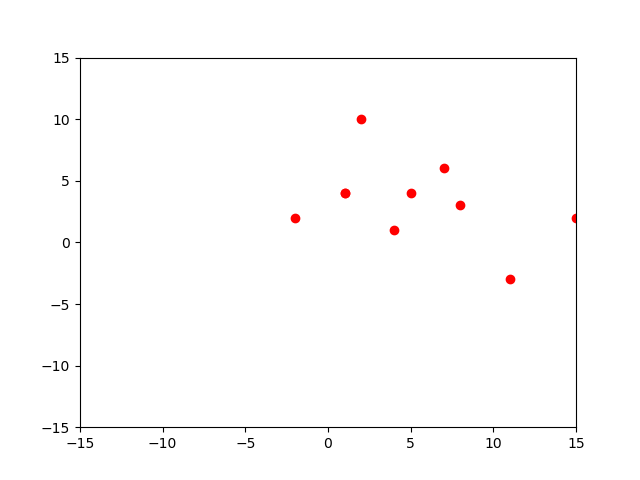

In [ ]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import Image

def main():
    P = ParticleSystem()
    for i in range(10):
        randx = random.randrange(1,20)
        randy = random.randrange(1,20)
        P.add_particle(randx, randy)
    
    fig, ax = plt.subplots()
    ln, = plt.plot([], [], 'ro')

    def init():
        ax.set_xlim(-15, 15)
        ax.set_ylim(-15, 15)
        return ln,
    
    def update(frame):
        randvx = random.randrange(-5,5)
        randvy = random.randrange(-5,5)    
        P.move_all(randvx, randvy)

        current_pos = P.get_positions()
        xdata = []
        ydata = []
        for i in range(10):
            pos = current_pos[i].get_position()
            xdata.append(pos[0])
            ydata.append(pos[1])
        
        ln.set_data(xdata, ydata)
        return ln,
    
    ani = FuncAnimation(fig, update, frames=range(100), init_func=init, blit=False)
    ani.save('random_walk.gif', writer='pillow')
    return Image('random_walk.gif')

main()